# Big Data Mart Sales

### Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

In [4]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading dataset
df = pd.read_csv('bigdatamart_Train.csv')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [6]:
df.shape

(8523, 12)

### checking for null values

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

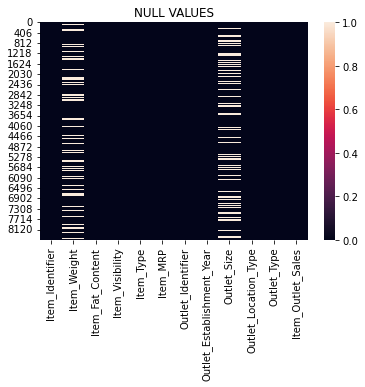

In [8]:
sns.heatmap(df.isnull())
plt.title('NULL VALUES')
plt.show()

So we can see that the train set has so many of null values present

In [9]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
# Getting the Unique values from the columns
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Item_Fat_Content has 5 unique categories

Item_Type has 16 unique categories

Outlet_Identifier has 10 unique categories

Outlet_Establishment_Year 9 discrete values

Outlet_Size has 3 unique categories

Outlet_Location_Type has 3 unique categories

Outlet_Type has 4 unique categories

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Fat_Content, Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type are object type meaning they are categorical in nature, while Outlet_Establishment_Year is discrete int type,

In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


From the above tables it is observed that the outlets have been operating from as early as 1985, on an average the outlets have been running since 1997, with last one having been established in 2009.

The average MRP of the items is 140.9 and 50% of the items are priced upto around 143.

The average sales made by the outlets is 2181.28

## Imputing all the Null Values in the datasets with the mean , median and mode

In [13]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [14]:
df['Outlet_Size'].fillna("Medium",inplace=True)

so we can see that we have filled some values with this mode

In [15]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [16]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Exploration of the dataset (EDA )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

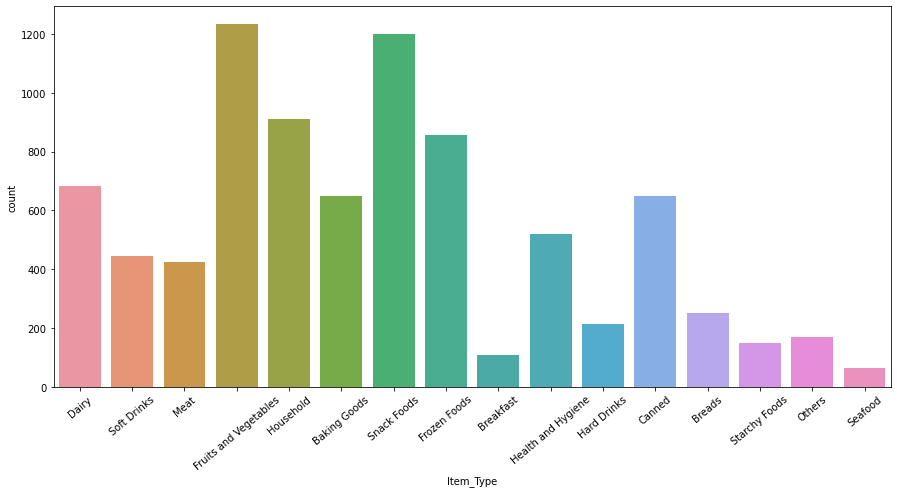

In [17]:
plt.figure(figsize = (15,7))
sns.countplot(df.Item_Type)
plt.xticks(rotation = 40)

It shows the count of items sold per item type

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

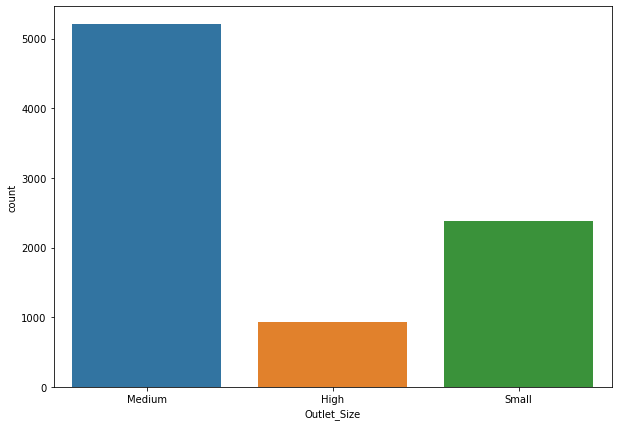

In [18]:
plt.figure(figsize = (10,7))
sns.countplot(df.Outlet_Size)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Count'>

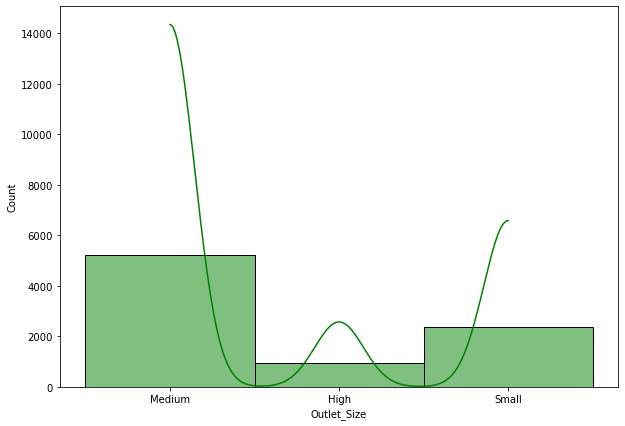

In [19]:
plt.figure(figsize = (10,7))
sns.histplot(df.Outlet_Size, color ='g',kde='True ')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Count'>

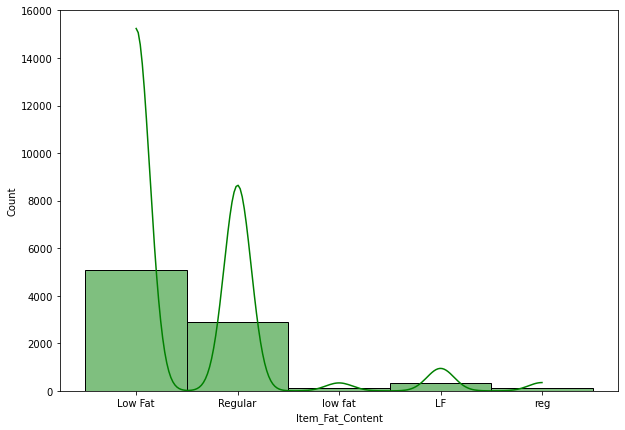

In [20]:
plt.figure(figsize = (10,7))
sns.histplot(df.Item_Fat_Content, kde='True ', color='g')

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

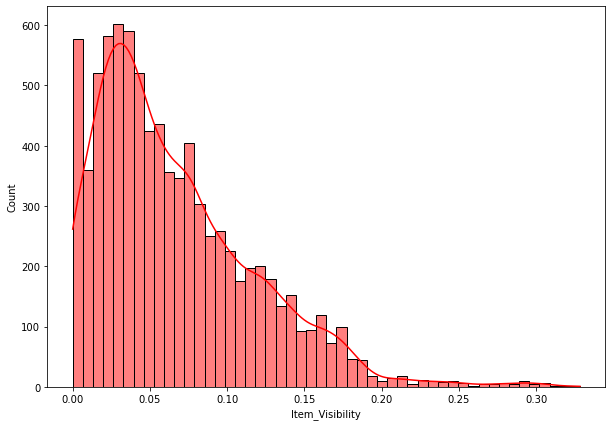

In [21]:
plt.figure(figsize = (10,7))
sns.histplot(df.Item_Visibility, kde='True ', color='r')

<AxesSubplot:xlabel='Item_MRP'>

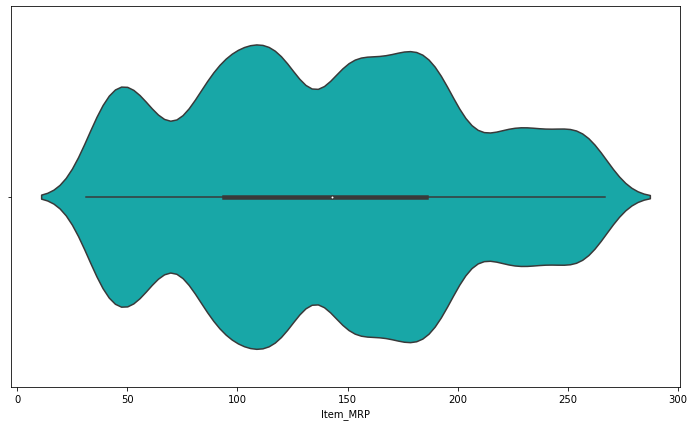

In [22]:
plt.figure(figsize=(12,7))
sns.violinplot(data=df , x ='Item_MRP', color ='c')

so we can see that the max of the MRP lies between the range of -- 100 to 200

<function matplotlib.pyplot.show(close=None, block=None)>

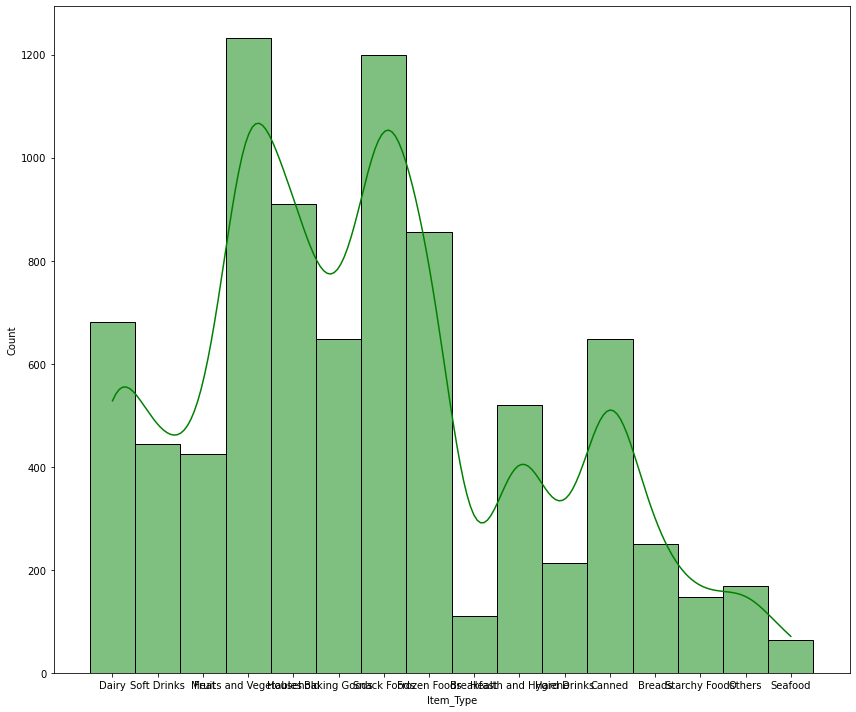

In [23]:
plt.figure(figsize = (12,10))
sns.histplot(df.Item_Type, kde='True ', color='g')
plt.tight_layout()
plt.show

As here we can see that the Snack foods vegetable and the Household foods touches the highest in the the hist graph thus this the max in the item type than others

<function matplotlib.pyplot.show(close=None, block=None)>

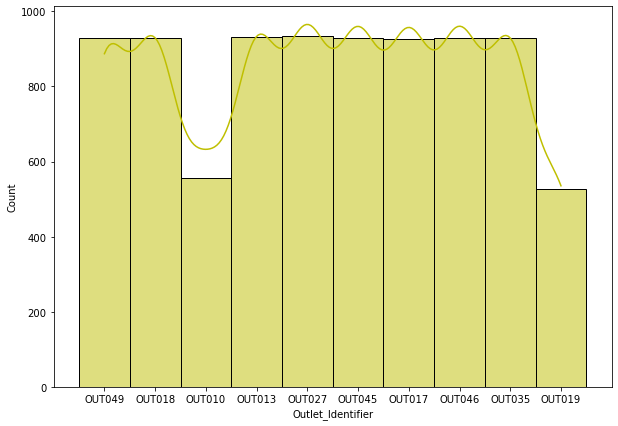

In [24]:
plt.figure(figsize = (10,7))
sns.histplot(df.Outlet_Identifier, kde='True ', color='y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

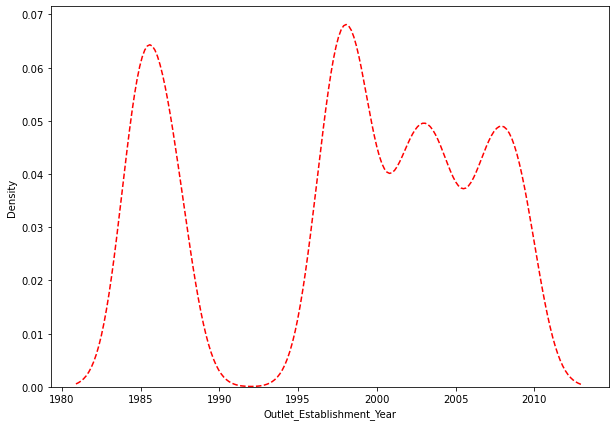

In [25]:
plt.figure(figsize = (10,7))
sns.kdeplot(df.Outlet_Establishment_Year, color='r', linestyle='--')
plt.show

As here we can see that the most of the outlets are being established -- in the year between 1995 to 2000 followed by the year 1985

<function matplotlib.pyplot.show(close=None, block=None)>

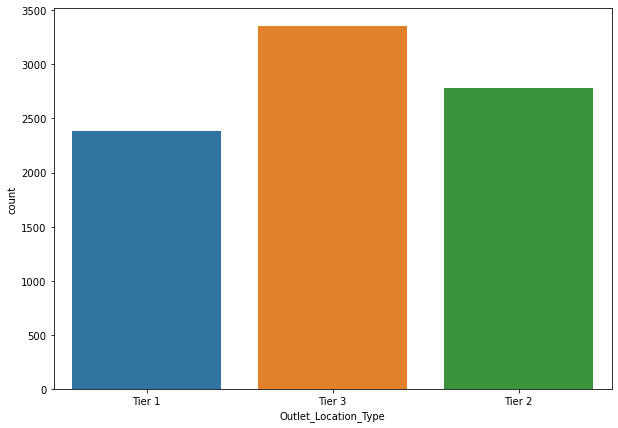

In [26]:
plt.figure(figsize = (10,7))
sns.countplot(df.Outlet_Location_Type, linestyle='--')
plt.show

So we can see here that the there are highest of the tier 3 location type in the dataset

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

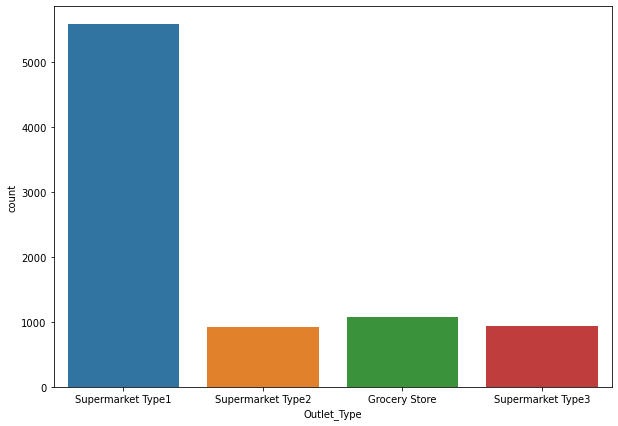

In [27]:
plt.figure(figsize = (10,7))
sns.countplot(df.Outlet_Type)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

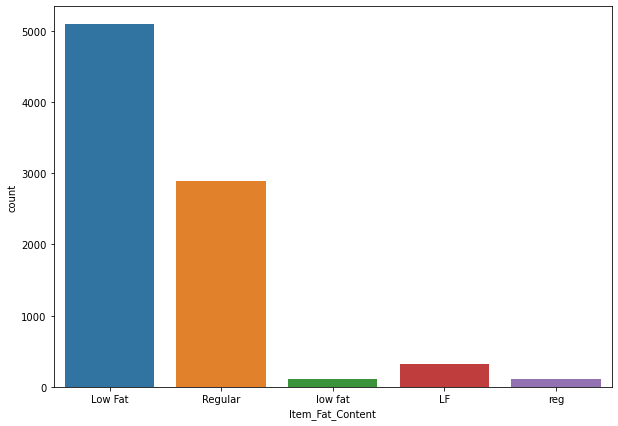

In [28]:
plt.figure(figsize = (10,7))
sns.countplot(df.Item_Fat_Content)

So here also we can see that the unit of the item fat content we have the products more of low fat content followed by regular

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

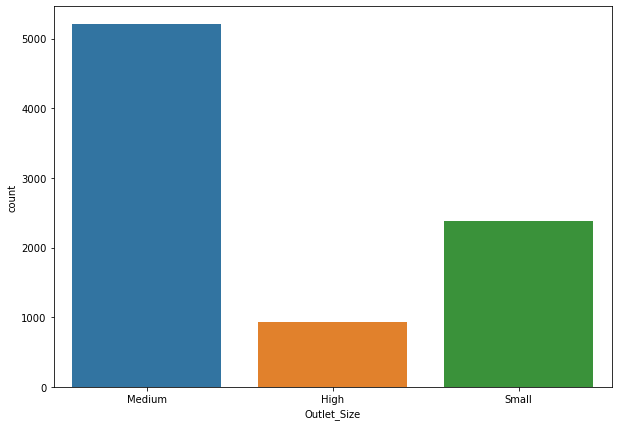

In [29]:
plt.figure(figsize = (10,7))
sns.countplot(df.Outlet_Size)

### Bivariate Analysis

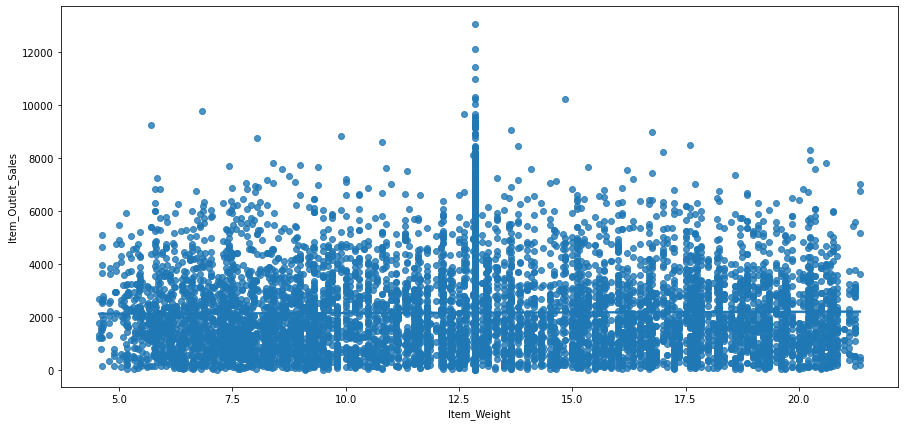

In [30]:
plt.figure(figsize=(15,7))
sns.regplot(data=df, x ='Item_Weight', y ='Item_Outlet_Sales')
plt.show()

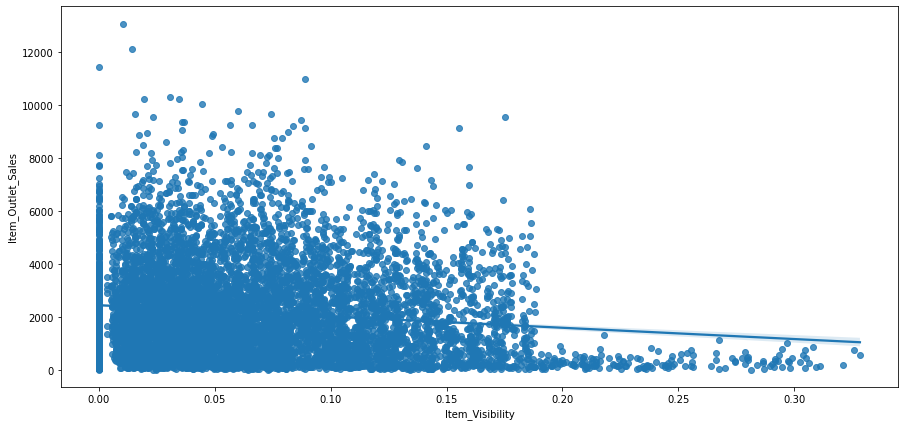

In [31]:
plt.figure(figsize=(15,7))
sns.regplot(data=df, x ='Item_Visibility', y ='Item_Outlet_Sales')
plt.show()

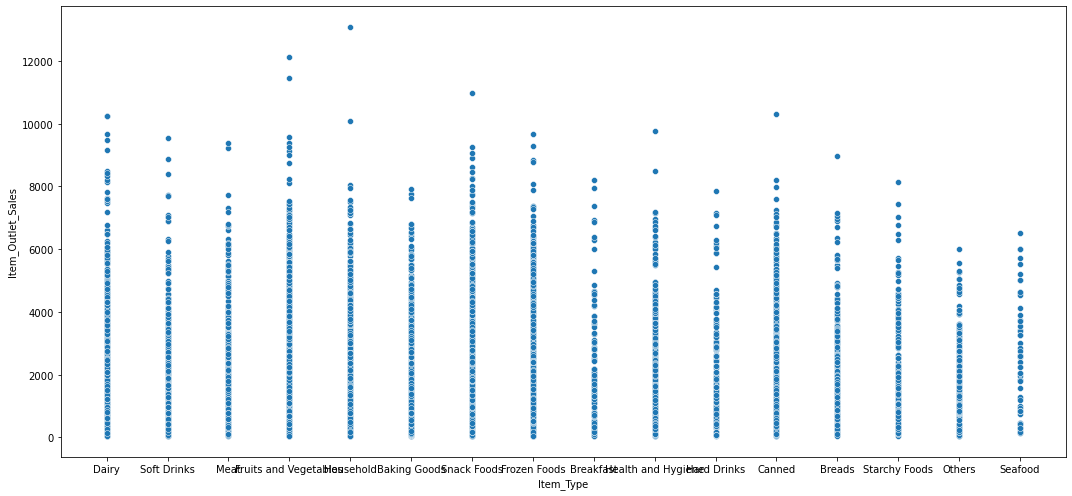

In [32]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x ='Item_Type', y ='Item_Outlet_Sales')
plt.tight_layout()

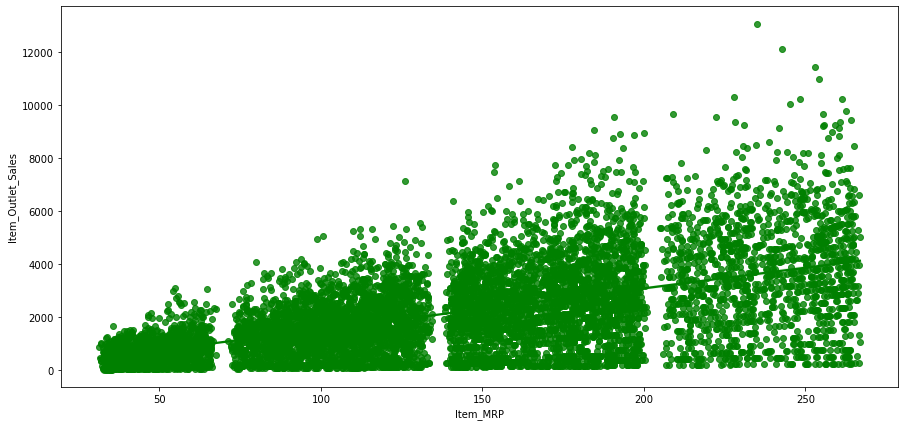

In [33]:
plt.figure(figsize=(15,7))
sns.regplot(data=df, x ='Item_MRP', y ='Item_Outlet_Sales', color ='g')
plt.show()

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

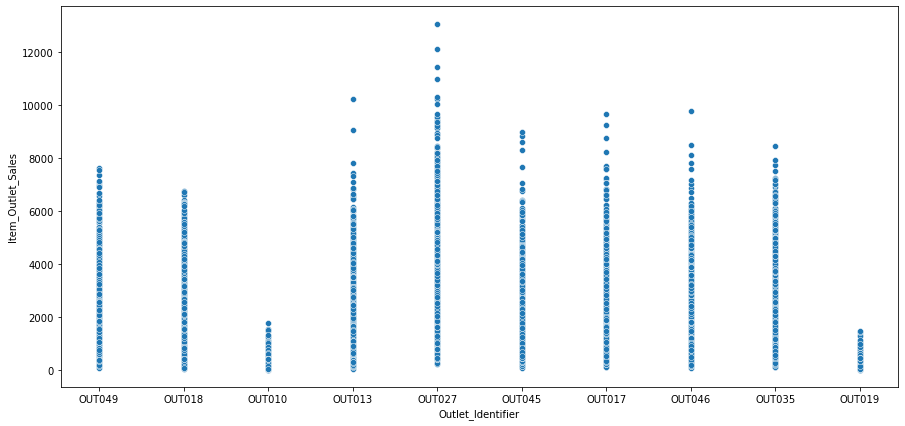

In [34]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x ='Outlet_Identifier', y ='Item_Outlet_Sales',palette ='Set1')

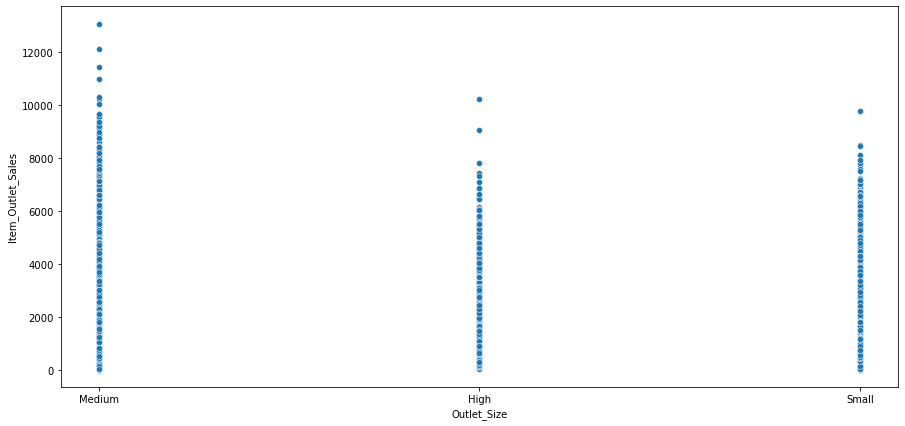

In [35]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x ='Outlet_Size', y ='Item_Outlet_Sales',palette ='Set1')
plt.show()

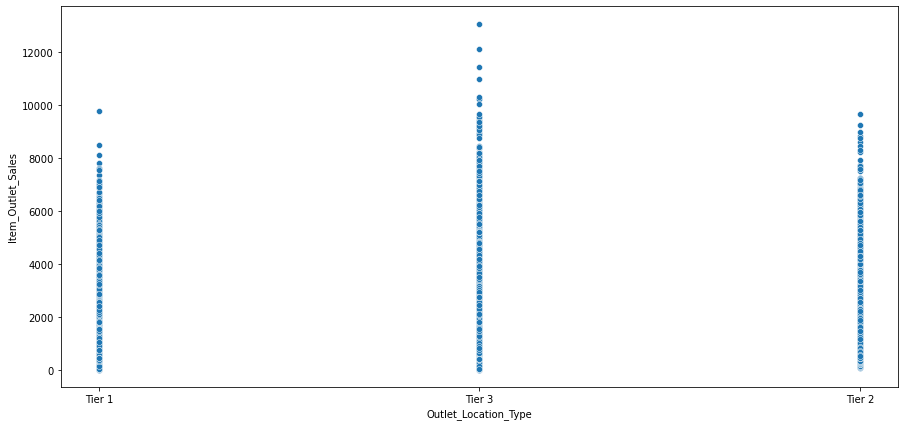

In [36]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df  , x='Outlet_Location_Type', y ='Item_Outlet_Sales')
plt.show()

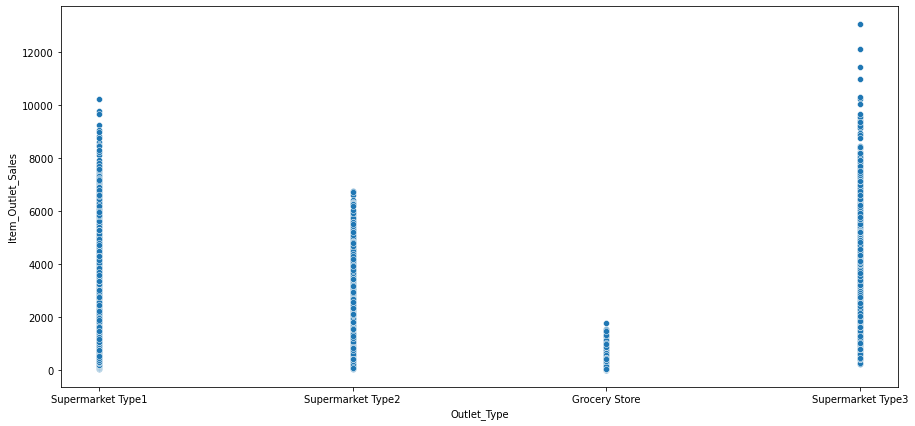

In [37]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df , x='Outlet_Type', y ='Item_Outlet_Sales')
plt.show()

we have more of the numbers of medium outlet size followed by the small outlet size and we have very few of the high outlet size

### Multivariate Analysis Plot

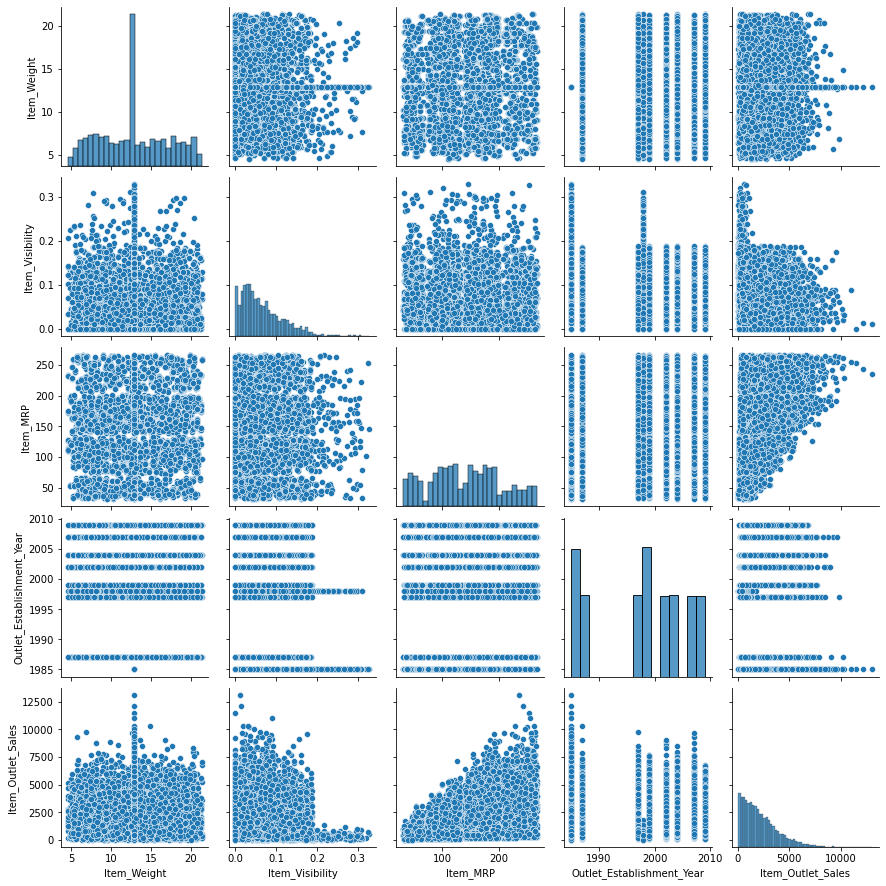

In [38]:
sns.pairplot(df)
plt.show()

### Outliers Checking & Analysis

<AxesSubplot:>

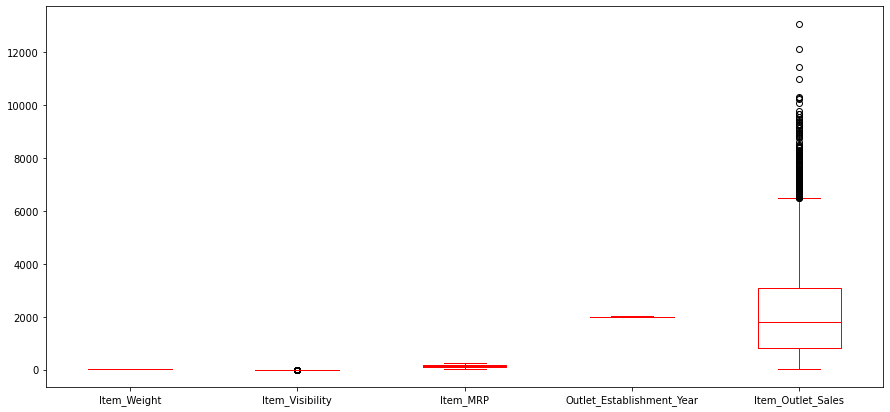

In [39]:
df.plot(kind="box", figsize = (15,7), color="r")

so we can see that we have only some outliers in the item_visibility column

## Correlation Analysis

In [40]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


## Correalation using the Heatmap

Text(0.5, 1.0, 'Correlation matrix')

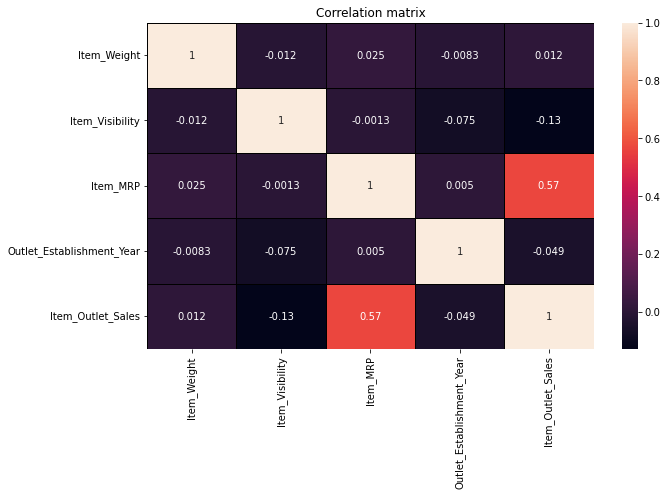

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot =True, linecolor='black', linewidth=1,  robust=True)
plt.title('Correlation matrix')

## Encoding using the Ordinal encoder

In [42]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["Outlet_Type"] = ord_enc.fit_transform(df[["Outlet_Type"]])
df['Outlet_Location_Type'] =ord_enc.fit_transform(df[["Outlet_Location_Type"]])
df['Outlet_Size'] =ord_enc.fit_transform(df[["Outlet_Size"]])
df['Item_Fat_Content'] =ord_enc.fit_transform(df[["Item_Fat_Content"]])
df['Item_Type'] =ord_enc.fit_transform(df[["Item_Type"]])

In [43]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1.0,0.016047,4.0,249.8092,OUT049,1999,1.0,0.0,1.0,3735.1380
1,DRC01,5.92,2.0,0.019278,14.0,48.2692,OUT018,2009,1.0,2.0,2.0,443.4228
2,FDN15,17.50,1.0,0.016760,10.0,141.6180,OUT049,1999,1.0,0.0,1.0,2097.2700
3,FDX07,19.20,2.0,0.000000,6.0,182.0950,OUT010,1998,1.0,2.0,0.0,732.3800
4,NCD19,8.93,1.0,0.000000,9.0,53.8614,OUT013,1987,0.0,2.0,1.0,994.7052


## Checking for the Skewness

In [44]:
df.skew()

Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

## Data cleaning

#### Removing some neccessary ouliers

In [45]:
# Using zscore to remove outliers in the feature item visibility
variables= df[['Item_Visibility']]
from scipy.stats import zscore

z=np.abs(zscore(variables))

# Creating new dataframe
new_df=df[(z<3).all(axis=1)]
new_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1.0,0.016047,4.0,249.8092,OUT049,1999,1.0,0.0,1.0,3735.1380
1,DRC01,5.920,2.0,0.019278,14.0,48.2692,OUT018,2009,1.0,2.0,2.0,443.4228
2,FDN15,17.500,1.0,0.016760,10.0,141.6180,OUT049,1999,1.0,0.0,1.0,2097.2700
3,FDX07,19.200,2.0,0.000000,6.0,182.0950,OUT010,1998,1.0,2.0,0.0,732.3800
4,NCD19,8.930,1.0,0.000000,9.0,53.8614,OUT013,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1.0,0.056783,13.0,214.5218,OUT013,1987,0.0,2.0,1.0,2778.3834
8519,FDS36,8.380,2.0,0.046982,0.0,108.1570,OUT045,2002,1.0,1.0,1.0,549.2850
8520,NCJ29,10.600,1.0,0.035186,8.0,85.1224,OUT035,2004,2.0,1.0,1.0,1193.1136
8521,FDN46,7.210,2.0,0.145221,13.0,103.1332,OUT018,2009,1.0,2.0,2.0,1845.5976


In [46]:
print('old_dataframe',df.shape)
print('new_dataframe', new_df.shape)
print('total_dropped_rows', df.shape[0]-new_df.shape[0])

old_dataframe (8523, 12)
new_dataframe (8428, 12)
total_dropped_rows 95


In [47]:
# Let's check the the data loss
data_loss = (8523-8428)/8523*100
data_loss

1.1146309984747156

so we have a very minimal data loss here

## Splitting the data into x and y

In [48]:
x = new_df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'], axis=1)
y =new_df.iloc[:,-1]

In [49]:
x.shape

(8428, 9)

In [50]:
y.shape

(8428,)

In [51]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,1.0,0.016047,4.0,249.8092,1999,1.0,0.0,1.0
1,5.920,2.0,0.019278,14.0,48.2692,2009,1.0,2.0,2.0
2,17.500,1.0,0.016760,10.0,141.6180,1999,1.0,0.0,1.0
3,19.200,2.0,0.000000,6.0,182.0950,1998,1.0,2.0,0.0
4,8.930,1.0,0.000000,9.0,53.8614,1987,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
8518,6.865,1.0,0.056783,13.0,214.5218,1987,0.0,2.0,1.0
8519,8.380,2.0,0.046982,0.0,108.1570,2002,1.0,1.0,1.0
8520,10.600,1.0,0.035186,8.0,85.1224,2004,2.0,1.0,1.0
8521,7.210,2.0,0.145221,13.0,103.1332,2009,1.0,2.0,2.0


### Removing the skewness with the power_transformer

In [52]:
from sklearn.preprocessing  import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.820763  , -0.52071354, -1.14226961, ..., -0.28556618,
        -1.3800971 , -0.14516058],
       [-1.73031914,  1.01170173, -1.03291304, ..., -0.28556618,
         1.08970949,  1.03470397],
       [ 1.08264587, -0.52071354, -1.11787359, ..., -0.28556618,
        -1.3800971 , -0.14516058],
       ...,
       [-0.49544676, -0.52071354, -0.53775357, ...,  1.39823948,
        -0.13724678, -0.14516058],
       [-1.3704964 ,  1.01170173,  1.53830862, ..., -0.28556618,
         1.08970949,  1.03470397],
       [ 0.49007876, -0.52071354, -0.268203  , ...,  1.39823948,
        -1.3800971 , -0.14516058]])

In [53]:
x.shape

(8428, 9)

In [54]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8
0,-0.820763,-0.520714,-1.142270,-0.713260,1.622782,0.039060,-0.285566,-1.380097,-0.145161
1,-1.730319,1.011702,-1.032913,1.505750,-1.595589,1.453989,-0.285566,1.089709,1.034704
2,1.082646,-0.520714,-1.117874,0.684503,0.081596,0.039060,-0.285566,-1.380097,-0.145161
3,1.442689,1.011702,-1.734798,-0.216081,0.690021,-0.085435,-0.285566,1.089709,-1.974400
4,-0.915510,-0.520714,-1.734798,0.468305,-1.476469,-1.281792,-1.921762,1.089709,-0.145161
...,...,...,...,...,...,...,...,...,...
8423,-1.464995,-0.520714,0.033409,1.306137,1.147914,-1.281792,-1.921762,1.089709,-0.145161
8424,-1.058287,1.011702,-0.212619,-1.924399,-0.462744,0.430122,-0.285566,-0.137247,-0.145161
8425,-0.495447,-0.520714,-0.537754,0.246688,-0.867711,0.706147,1.398239,-0.137247,-0.145161
8426,-1.370496,1.011702,1.538309,1.306137,-0.548634,1.453989,-0.285566,1.089709,1.034704


In [55]:
pd.DataFrame(x).skew()

0   -0.068809
1    0.031597
2    0.115444
3   -0.164518
4   -0.114976
5   -0.213023
6   -0.041756
7   -0.221268
8    0.009297
dtype: float64

As for now we can see that we have removed the skewness from the model

### Plotting the columns for checking the Normal distributions

In [56]:
x = pd.DataFrame(x)

Text(0.5, 1.0, 'The Normal distribution Kernel density estimators  for all  the columns')

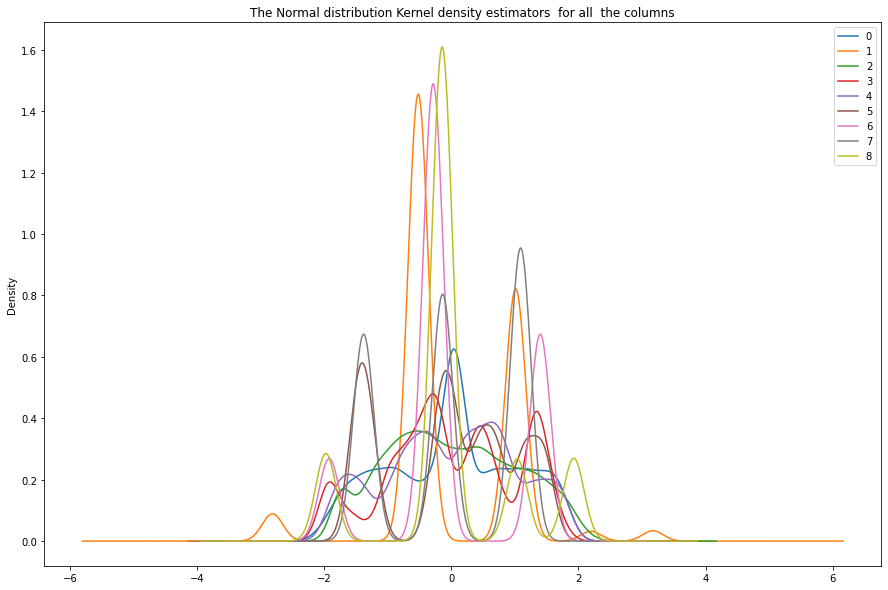

In [57]:
x.plot( kind='kde', figsize=(15,10), stacked=False)
plt.title('The Normal distribution Kernel density estimators  for all  the columns')

so for now we can see almost most of them areon the Normal distribution curve but because of some inverse relationships we are having some plots that are -ve skewed still which just shows us that they are having a inverse relation with the target variable

## Feature selection

Varince threshold method

In [58]:
from sklearn.feature_selection import VarianceThreshold
# we are  importing  the  sklearn's  feature  selection technique  here  to extract  some imp  feature   from  the  model
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(x)

VarianceThreshold(threshold=0)

In [59]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [60]:
x =pd.DataFrame(x)

In [61]:
x.columns[var_thres.get_support()]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [62]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_thres.get_support()]]
print(len(cons_columns))

0


In [63]:
x.shape

(8428, 9)

So as we can see that the with the help of variance there we got to know the all the features here are important so now using the k best

## Selecting Kbest Feature selection

In [64]:
from sklearn.feature_selection import SelectKBest, f_classif

In [65]:
bestfeat = SelectKBest(score_func = f_classif, k =9)
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [66]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(9,'Score'))

   Feature     Score
4        4  3.442038
8        8  2.537242
5        5  1.193769
3        3  1.187482
2        2  1.134038
1        1  1.077495
0        0  1.036837
7        7  1.035182
6        6  1.004078


Selecting the best features based on scores above so we can see that the column 6 has most lowest features for the prediction thus we can even remove it

In [67]:
xbest = x.drop([6],axis=1)

In [68]:
xbest

,0,1,2,3,4,5,7,8
0,-0.820763,-0.520714,-1.142270,-0.713260,1.622782,0.039060,-1.380097,-0.145161
1,-1.730319,1.011702,-1.032913,1.505750,-1.595589,1.453989,1.089709,1.034704
2,1.082646,-0.520714,-1.117874,0.684503,0.081596,0.039060,-1.380097,-0.145161
3,1.442689,1.011702,-1.734798,-0.216081,0.690021,-0.085435,1.089709,-1.974400
4,-0.915510,-0.520714,-1.734798,0.468305,-1.476469,-1.281792,1.089709,-0.145161
...,...,...,...,...,...,...,...,...
8423,-1.464995,-0.520714,0.033409,1.306137,1.147914,-1.281792,1.089709,-0.145161
8424,-1.058287,1.011702,-0.212619,-1.924399,-0.462744,0.430122,-0.137247,-0.145161
8425,-0.495447,-0.520714,-0.537754,0.246688,-0.867711,0.706147,-0.137247,-0.145161
8426,-1.370496,1.011702,1.538309,1.306137,-0.548634,1.453989,1.089709,1.034704


Text(0.5, 1.0, 'The curve after Feature  selection with 8 features')

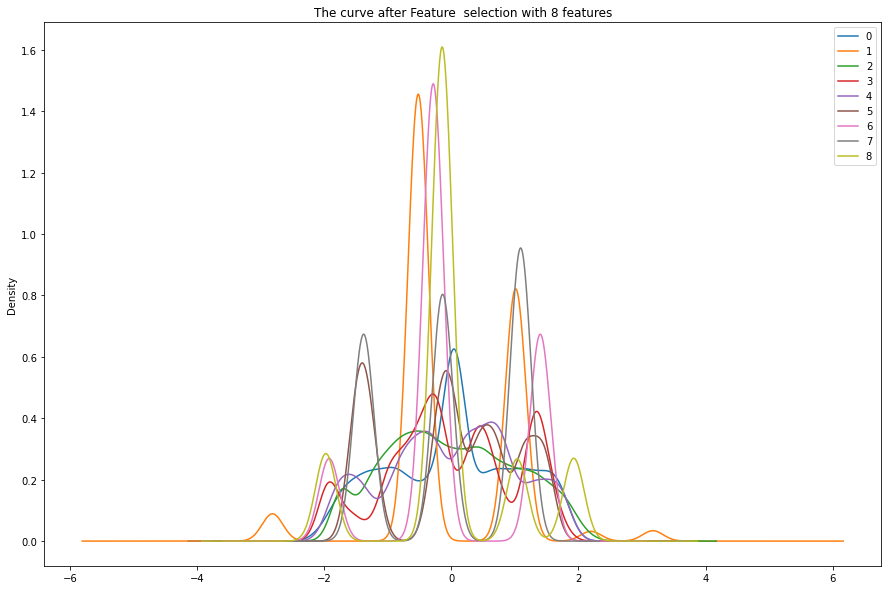

In [69]:
x.plot( kind='kde', figsize=(15,10))
plt.title('The curve after Feature  selection with 8 features')

Thus till now we have done features selection process where we have used 2 techniques now we will be proceeding further for building our model

## Building Base Model

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

## Checking for the best Random state to remove Bais among the models

In [71]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(xbest,y,test_size = .25, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.5823209445615403 on random_state: 5


## Splittig the train & test data

In [72]:
x_train,x_test,y_train,y_test = train_test_split(xbest,y,test_size = .25, random_state = 5)

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

## Random Forest Regression Model

In [74]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=500, random_state=5)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))

R2_Score: 0.5818301907000575
Mean abs error: 769.336708801329
Mean squared error: 1258356.8780289642


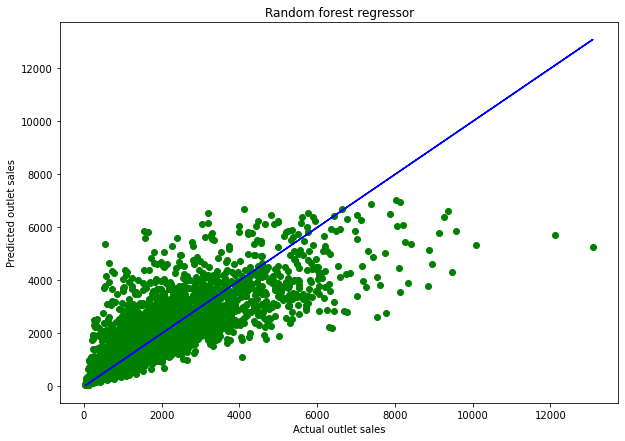

In [75]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,7))
plt.scatter(x=y_test,y=predRFR,color='g')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual outlet sales")
plt.ylabel("Predicted outlet sales")
plt.title("Random forest regressor")
plt.show()

## Linear Regressor

In [76]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error:',mean_absolute_error(y_test, predLR))
print('Mean squared error:',mean_squared_error(y_test, predLR))

R2_score: 0.5441697223682893
Mean abs error: 859.0438858801365
Mean squared error: 1371684.7852597814


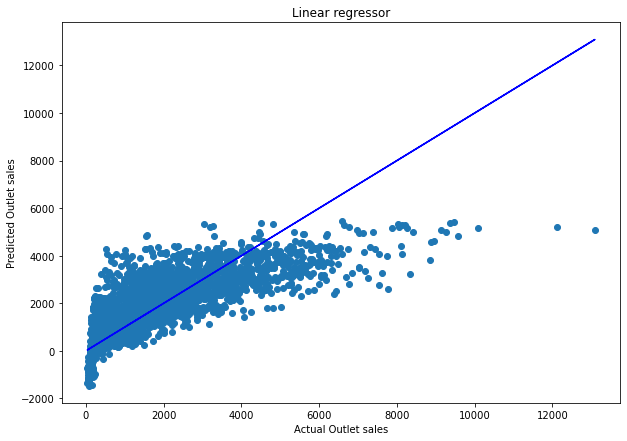

In [77]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,7))
plt.scatter(x=y_test,y=predLR,cmap='set1')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Outlet sales")
plt.ylabel("Predicted Outlet sales")
plt.title("Linear regressor")
plt.show()

## KNN Regressor

In [78]:
# Checking R2 score for KNN regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))

R2_Score: 0.5724236280560647
Mean abs error: 785.3540927806782
Mean squared error: 1286663.1128130932


Text(0.5, 1.0, 'K-nearest neighbors  regressor')

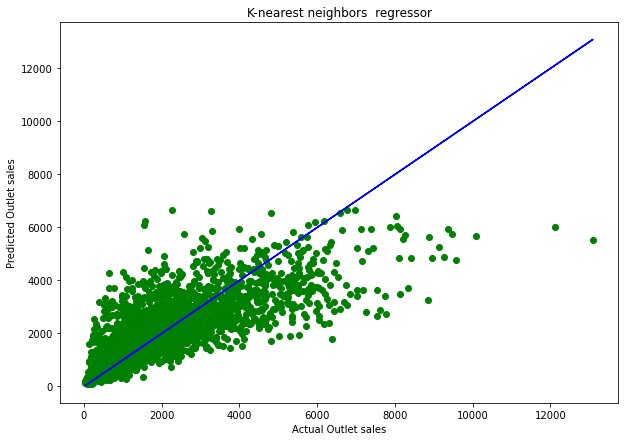

In [79]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,7))
plt.scatter(x=y_test,y=predknn,color='g')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Outlet sales")
plt.ylabel("Predicted Outlet sales")
plt.title("K-nearest neighbors  regressor")

### Support Vector Regression Mode

In [80]:
# Checking R2 score for svr
sv= SVR(kernel='linear')
sv.fit(x_train,y_train)

#prediction
predsv=sv.predict(x_test)
print('R2_Score:',r2_score(y_test,predsv))
print('Mean abs error:',mean_absolute_error(y_test, predsv))
print('Mean squared error:',mean_squared_error(y_test, predsv))

R2_Score: 0.4854578637414839
Mean abs error: 871.8470715650268
Mean squared error: 1548360.5506589813


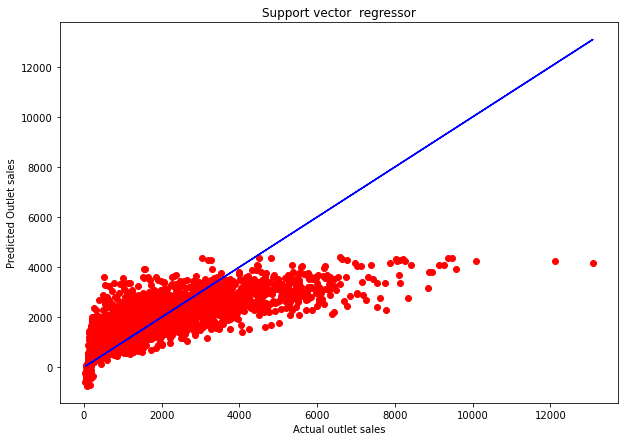

In [81]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,7))
plt.scatter(x=y_test,y=predsv,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual outlet sales")
plt.ylabel("Predicted Outlet sales")
plt.title("Support vector  regressor")
plt.show()

### Grdient boosting Regressor

In [82]:
# Checking R2 score for svr
Gb= GradientBoostingRegressor(n_estimators=300,  random_state=5, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)

#prediction
predGb=Gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predGb))
print('Mean abs error:',mean_absolute_error(y_test, predGb))
print('Mean squared error:',mean_squared_error(y_test, predGb))

R2_Score: 0.5950183368777192
Mean abs error: 753.0650643466405
Mean squared error: 1218671.0994719367


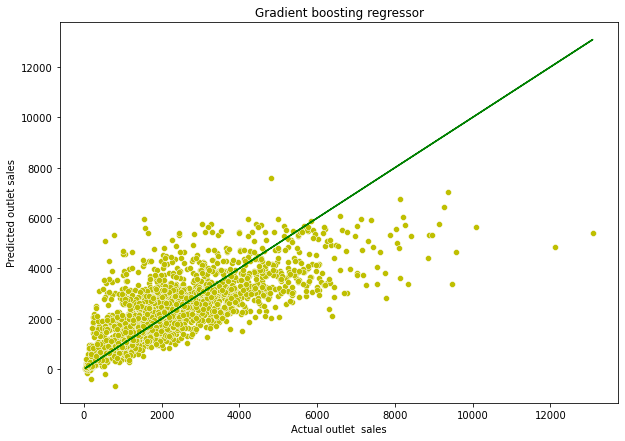

In [83]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,7))
sns.scatterplot(x=y_test,y=predGb,color='y')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual outlet  sales")
plt.ylabel("Predicted outlet sales")
plt.title("Gradient boosting regressor")
plt.show()

so we can see that the gradient boosting regressor is giving the result even better than the Random forest regressor thus we will be now going for the cross validation of all the model to remove any overfitting

## Model Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score

### Random Forest Regression

In [85]:
cross_val_score(RFR,xbest,y,cv=5).mean()

0.5426291349433978

## Linear Regressor

In [86]:
cross_val_score(LR,xbest,y,cv=5).mean()

0.51709186007786

## KNN regressor

In [87]:
cross_val_score(knn,xbest,y,cv=5).mean()

0.5365587769010979

## SVR Regression

In [88]:
cross_val_score(sv,xbest,y,cv=5).mean()

0.470651096630084

## Gradient Boosting Regressor

In [89]:
cross_val_score(Gb,xbest,y,cv=5).mean()

0.5749019995725272

So accroding to the Cross validation score of all the model we can see that the best cv score is here is again for the gradient boosting regressor

# Hyper Parameter Tuning

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
parameter = {'n_estimators':[100,200,300,400],
'learning_rate':[0.1,0.01,0.001,1],
 'subsample': [0.1,0.2,0.3,0.5,1],
 'max_depth':[1,2,3,4],
 'alpha':[0.1,0.01,0.001,1]}

In [92]:
GridCV = GridSearchCV(GradientBoostingRegressor(),parameter,cv=5,n_jobs = 3,verbose = 2)

In [93]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=3,
             param_grid={'alpha': [0.1, 0.01, 0.001, 1],
                         'learning_rate': [0.1, 0.01, 0.001, 1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.1, 0.2, 0.3, 0.5, 1]},
             verbose=2)

In [94]:
GridCV.best_params_

{'alpha': 0.01,
 'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 400,
 'subsample': 1}

In [98]:
Best_mod = GradientBoostingRegressor(n_estimators=400,alpha=0.01,learning_rate= 0.01, max_depth= 4, subsample = 1)
Best_mod.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.01, learning_rate=0.01, max_depth=4,
                          n_estimators=400, subsample=1)

In [99]:
gbpred = Best_mod.predict(x_test)

acc = r2_score(y_test,gbpred)
print(acc*100)

61.51891134091658


so after the Hypertuning now we have got a descent accuracy score of 61% on Gradient boosting

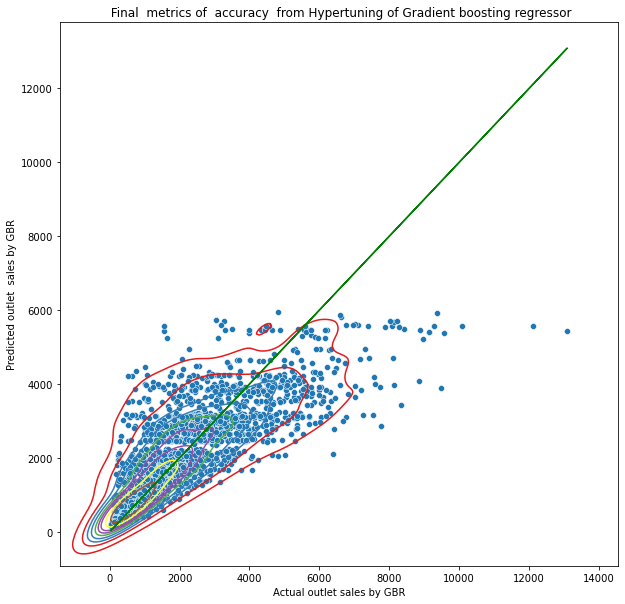

In [100]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=gbpred,palette='Set2')
sns.kdeplot(x=y_test,y=gbpred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual outlet sales by GBR")
plt.ylabel("Predicted outlet  sales by GBR")
plt.title(" Final  metrics of  accuracy  from Hypertuning of Gradient boosting regressor")
plt.show()

## Saving The Predictive Model

In [101]:
import joblib
joblib.dump(Best_mod,"BestModelBM.pkl")
# dumping  to  the  local  system for any cloud deployment  further

['BestModelBM.pkl']

# Conclusion and the prediction by The Model

In [102]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Best_mod.predict(x_test))
Bigmart_model = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Bigmart_model

,Original,Predicted
0,1071.9380,1537.498720
1,4567.3880,4235.180954
2,1511.3660,2465.363672
3,4540.7560,2486.133226
4,4153.9262,3945.926326
...,...,...
2102,2892.2352,2081.405167
2103,3281.0624,3828.562207
2104,4587.3620,4645.914026
2105,3207.8244,3829.012837


Text(0.5, 1.0, 'Original vs predicted  graph')

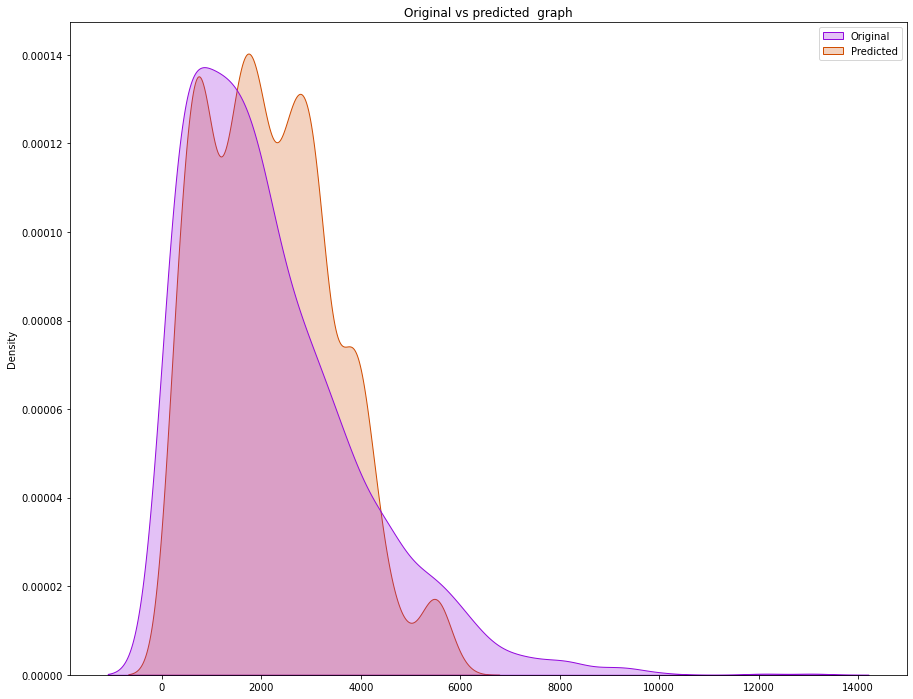

In [103]:
plt.figure(figsize=(15,12))
sns.kdeplot(data=Bigmart_model, palette='gnuplot',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')